In [32]:
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
import ast

In [33]:
df  = pd.read_csv('DataBase.csv')
df.head()

,s1,s2
0,"{'ax': -0.9, 'ay': 0.145, 'az': -0.381, 'wx': ...","{'ax': 0.886, 'ay': 0.207, 'az': 0.354, 'wx': ..."
1,"{'ax': -0.902, 'ay': 0.146, 'az': -0.387, 'wx'...","{'ax': 0.892, 'ay': 0.206, 'az': 0.35, 'wx': 0..."
2,"{'ax': -0.91, 'ay': 0.15, 'az': -0.394, 'wx': ...","{'ax': 0.891, 'ay': 0.206, 'az': 0.352, 'wx': ..."
3,"{'ax': -0.915, 'ay': 0.143, 'az': -0.393, 'wx'...","{'ax': 0.887, 'ay': 0.206, 'az': 0.346, 'wx': ..."
4,"{'ax': -0.904, 'ay': 0.152, 'az': -0.391, 'wx'...","{'ax': 0.892, 'ay': 0.203, 'az': 0.352, 'wx': ..."


# CONVERSÃO DE DADOS

In [34]:
df = df.head(20000).copy()

In [35]:
df['time'] = [0.02*i for i in range(len(df))]
df

,s1,s2,time
0,"{'ax': -0.9, 'ay': 0.145, 'az': -0.381, 'wx': ...","{'ax': 0.886, 'ay': 0.207, 'az': 0.354, 'wx': ...",0.00
1,"{'ax': -0.902, 'ay': 0.146, 'az': -0.387, 'wx'...","{'ax': 0.892, 'ay': 0.206, 'az': 0.35, 'wx': 0...",0.02
2,"{'ax': -0.91, 'ay': 0.15, 'az': -0.394, 'wx': ...","{'ax': 0.891, 'ay': 0.206, 'az': 0.352, 'wx': ...",0.04
3,"{'ax': -0.915, 'ay': 0.143, 'az': -0.393, 'wx'...","{'ax': 0.887, 'ay': 0.206, 'az': 0.346, 'wx': ...",0.06
4,"{'ax': -0.904, 'ay': 0.152, 'az': -0.391, 'wx'...","{'ax': 0.892, 'ay': 0.203, 'az': 0.352, 'wx': ...",0.08
...,...,...,...
957,"{'ax': -0.004, 'ay': -0.021, 'az': 0.91, 'wx':...","{'ax': -0.028, 'ay': -1.062, 'az': 0.146, 'wx'...",19.14
958,"{'ax': 0.0, 'ay': -0.017, 'az': 0.902, 'wx': 0...","{'ax': -0.027, 'ay': -1.053, 'az': 0.146, 'wx'...",19.16
959,"{'ax': -0.021, 'ay': -0.014, 'az': 0.886, 'wx'...","{'ax': -0.018, 'ay': -1.047, 'az': 0.14, 'wx':...",19.18
960,"{'ax': 0.007, 'ay': -0.01, 'az': 0.898, 'wx': ...","{'ax': -0.033, 'ay': -1.049, 'az': 0.158, 'wx'...",19.20


In [36]:
df['s1'] = df.s1.apply(ast.literal_eval)
df['s2'] = df.s2.apply(ast.literal_eval)
display(df.head())
df.info()

,s1,s2,time
0,"{'ax': -0.9, 'ay': 0.145, 'az': -0.381, 'wx': ...","{'ax': 0.886, 'ay': 0.207, 'az': 0.354, 'wx': ...",0.00
1,"{'ax': -0.902, 'ay': 0.146, 'az': -0.387, 'wx'...","{'ax': 0.892, 'ay': 0.206, 'az': 0.35, 'wx': 0...",0.02
2,"{'ax': -0.91, 'ay': 0.15, 'az': -0.394, 'wx': ...","{'ax': 0.891, 'ay': 0.206, 'az': 0.352, 'wx': ...",0.04
3,"{'ax': -0.915, 'ay': 0.143, 'az': -0.393, 'wx'...","{'ax': 0.887, 'ay': 0.206, 'az': 0.346, 'wx': ...",0.06
4,"{'ax': -0.904, 'ay': 0.152, 'az': -0.391, 'wx'...","{'ax': 0.892, 'ay': 0.203, 'az': 0.352, 'wx': ...",0.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   s1      962 non-null    object 
 1   s2      962 non-null    object 
 2   time    962 non-null    float64
dtypes: float64(1), object(2)
memory usage: 22.7+ KB


# VISUALIZAÇÃO SIMPLES

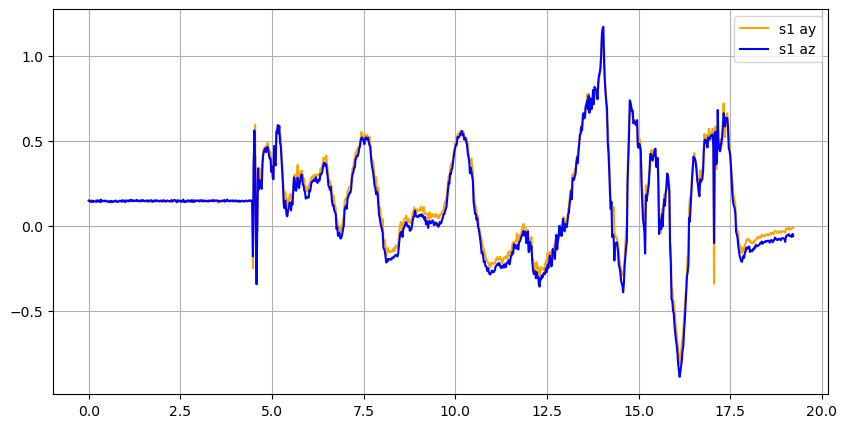

In [83]:
df['time'] = df.time - df.time.values[0]

def normalize(data):
    return np.array(data - np.mean(data))/np.std(data)

def compare(data1, data2):
    data1 = normalize(data1)
    data2 = normalize(data2)
    score = wasserstein_distance(data1, data2)
    return data1, data2, score


key1 = 'ay'
key2 = 'az'
plt.figure(figsize=(10, 5))
plt.plot(df.time, [data[key1]  for data in df.s1], color='orange', label=f's1 {key1}')
plt.plot(df.time, [data[key2] - np.mean([a[key1] for a in df.s2[:20]]) for data in df.s2], color='blue', label=f's1 {key2}')
plt.legend(), plt.grid()
plt.show()

# APLICANDO LIMITES

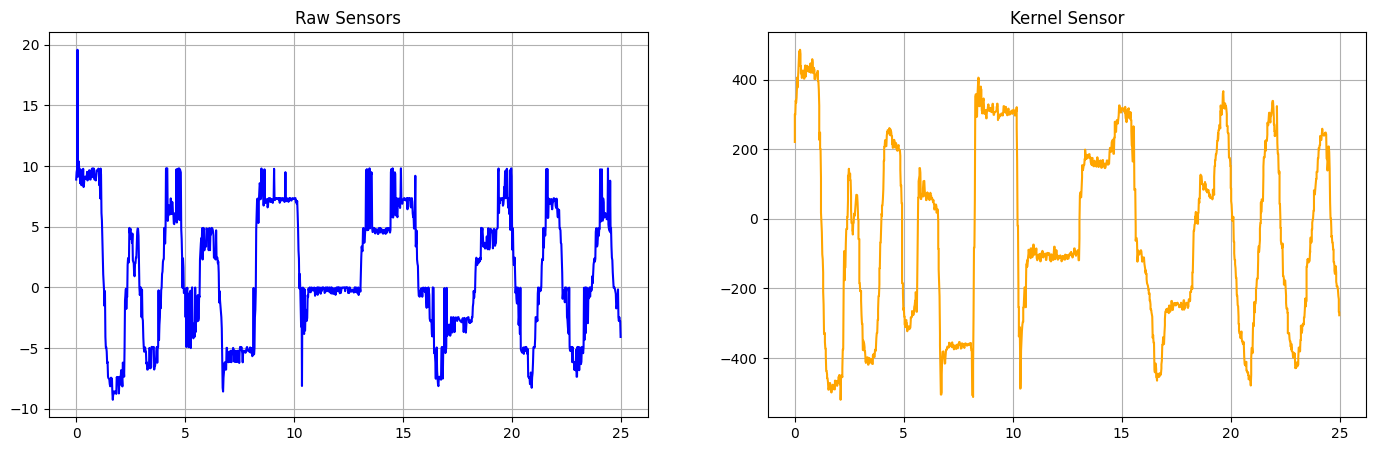

In [ ]:
def applyRange(df, range=None):
    if range is None:
        return df
    
    df = df.copy().loc[(df.time > range[0]) & (df.time < range[1])]
    df['time'] = df.time - df.time.values[0]
    return df


SAMPLE_RANGE = (10, 35)
target  = applyRange(target,  SAMPLE_RANGE)
desired = applyRange(desired, SAMPLE_RANGE) 

plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
plt.plot(target.time, [s['ax'] for s in target['s1']], color='blue')
plt.title('Raw Sensors')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(desired.time, desired.ax, color='orange')
plt.title('Kernel Sensor')
plt.grid()

# TRATAMENTO E VISUALIZAÇÃO

In [ ]:
def normalize(data):
    return np.array(data - np.mean(data))/np.std(data)

def compare(data1, data2):
    data1 = normalize(data1)
    data2 = normalize(data2)
    score = wasserstein_distance(data1, data2)
    return data1, data2, score

def adjustData(df):
    df = df.copy()

    for i, row in df.iterrows():
        row['s1']['ay'] = -row['s1']['ay']
        row['s1']['wy'] = -row['s1']['wy'] 
        row['s1']['az'] = -row['s1']['az']
        row['s1']['wz'] = -row['s1']['wz'] 

        row['s2']['ay'] = -row['s2']['ay']
        row['s2']['wy'] = -row['s2']['wy'] 
        row['s2']['az'] = -row['s2']['az']
        row['s2']['wz'] = -row['s2']['wz'] 
        
    return df

target = adjustData(target)

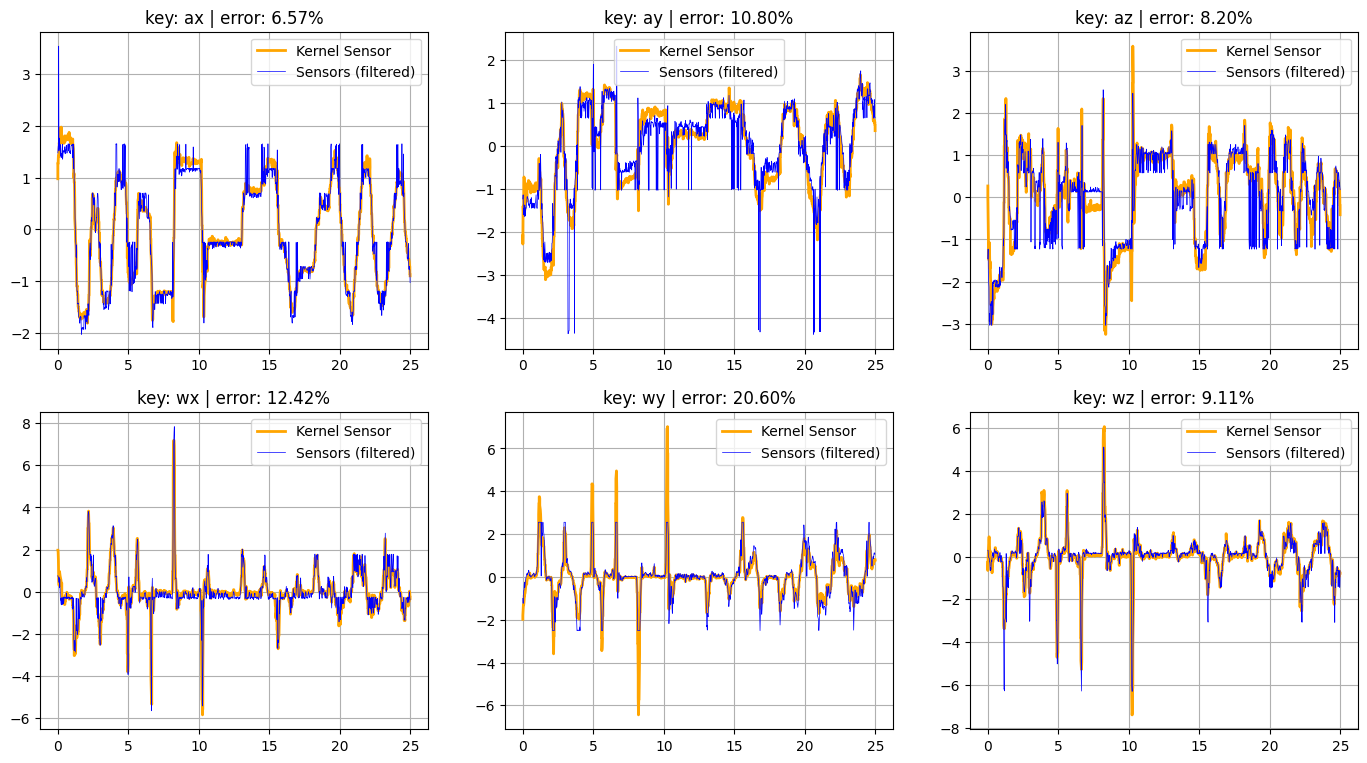

In [ ]:
plt.figure(figsize=(17, 14))
index  = 0
sensor = 's1'

for key in ['ax', 'ay', 'az', 'wx', 'wy', 'wz']:
    d, t, score = compare(desired[key], [s[key] for s in target[sensor]])
    index = index + 1

    plt.subplot(3, 3, index)
    plt.plot(desired.time, d, color='orange', label='Kernel Sensor', linewidth=2)
    plt.plot(desired.time, t, color='blue',  label='Sensors (filtered)', linewidth=.5)
    plt.title(f'key: {key} | error: {score*100:.2f}%')
    plt.legend(), plt.grid()

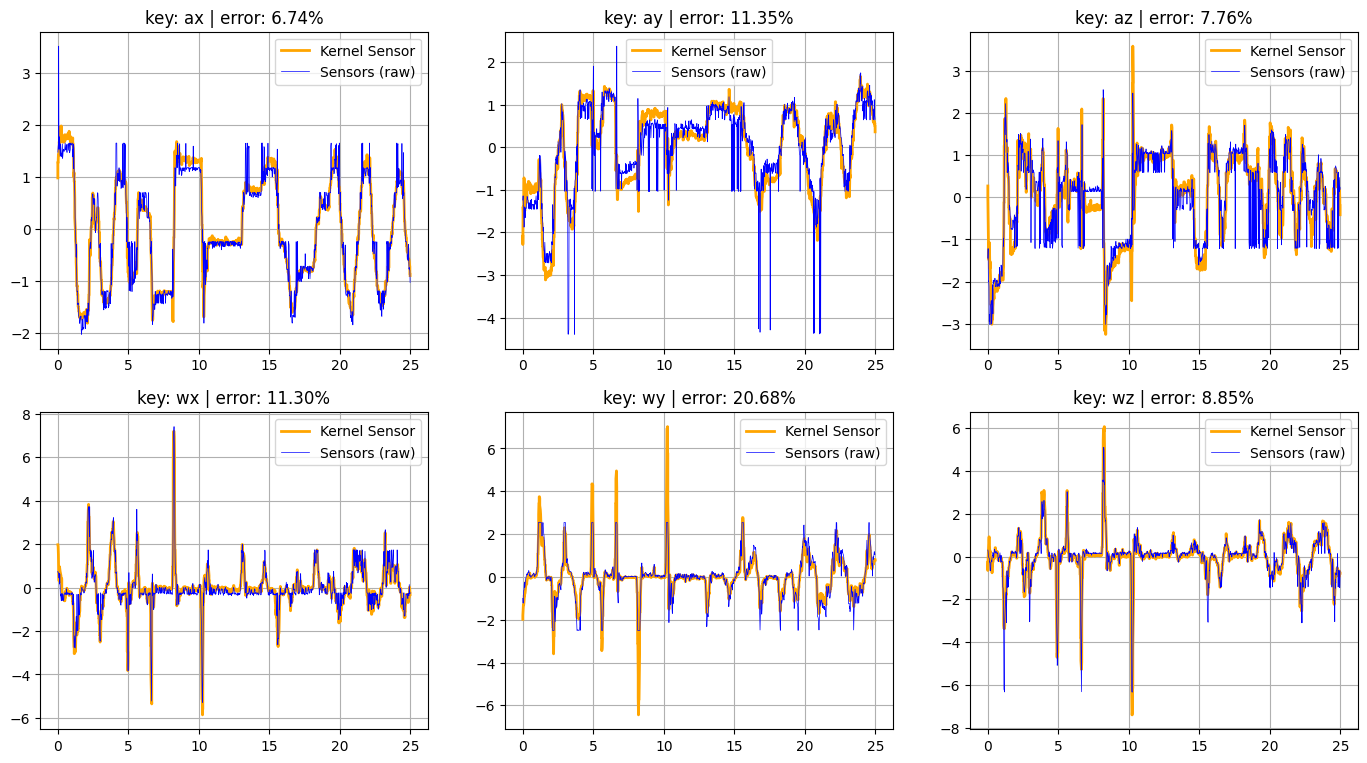

In [ ]:
plt.figure(figsize=(17, 14))
index  = 0
sensor = 's2'

for key in ['ax', 'ay', 'az', 'wx', 'wy', 'wz']:
    index = index + 1

    plt.subplot(3, 3, index)
    yDesired = np.array(desired[key])
    yTarget  = np.array([s[key] for s in target[sensor]])
    d, t, score = compare(yDesired, yTarget)

    plt.plot(desired.time, d, color='orange', label='Kernel Sensor', linewidth=2)
    plt.plot(desired.time, t, color='blue',  label='Sensors (raw)', linewidth=.5)
    plt.title(f'key: {key} | error: {score*100:.2f}%')
    plt.legend(), plt.grid()

In [ ]:
print(float(np.round(target.time.diff().median(), 3)))
dt = 0.020

0.02


In [ ]:
target.to_pickle('../B - Filter/files/Target.pkl')
desired.to_pickle('../B - Filter/files/Desired.pkl')